In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c titanic

In [11]:
from zipfile import ZipFile
dataset = '/content/titanic.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [13]:
titanic_dataset = pd.read_csv('/content/train.csv')

In [15]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
titanic_dataset.shape

(891, 12)

In [17]:
titanic_dataset['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [19]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

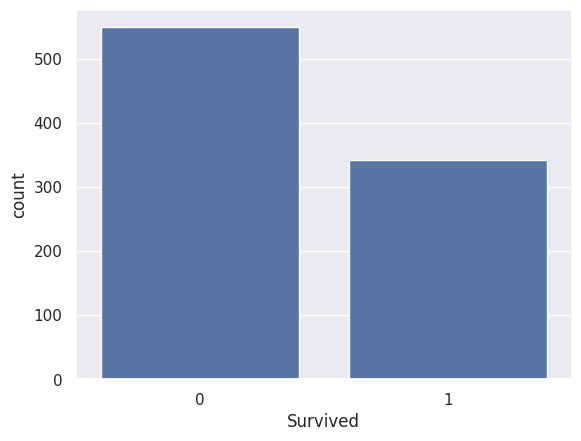

In [23]:
sns.countplot( x = 'Survived' , data=titanic_dataset)

In [24]:
titanic_dataset['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

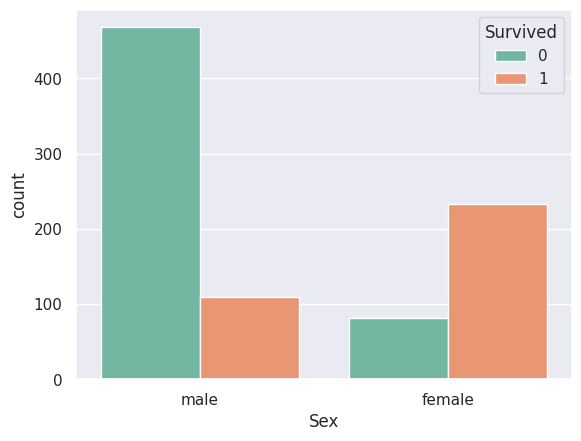

In [36]:
sns.countplot(x='Sex',hue = 'Survived' ,data = titanic_dataset, palette='Set2')

In [40]:
titanic_dataset['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


<Axes: xlabel='Pclass', ylabel='count'>

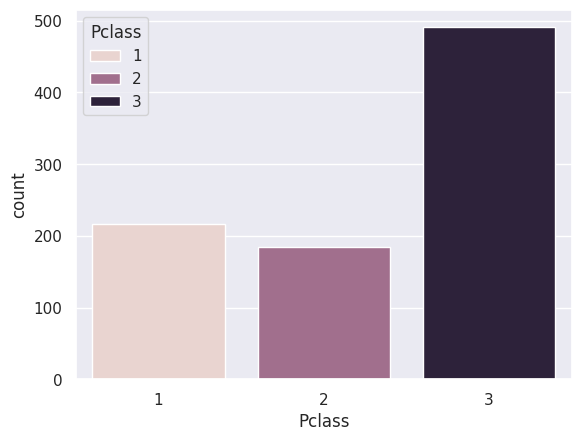

In [39]:
sns.countplot( x= 'Pclass', data=titanic_dataset, hue='Pclass')

<Axes: xlabel='Pclass', ylabel='count'>

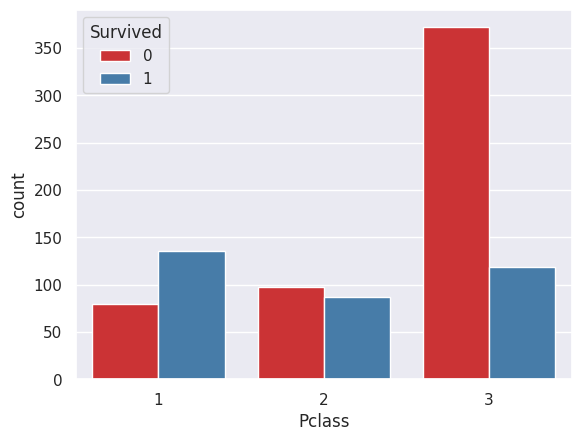

In [45]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_dataset, palette='Set1')

In [46]:
titanic_dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [47]:
titanic_dataset.drop(columns='Cabin', axis = 1,inplace = True)

In [49]:
titanic_dataset['Age'].fillna( titanic_dataset['Age'].mean(), inplace= True )

In [50]:
titanic_dataset['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [53]:
print( titanic_dataset['Embarked'].mode() )

0    S
Name: Embarked, dtype: object


In [54]:
print( titanic_dataset['Embarked'].mode()[0] )

S


In [55]:
titanic_dataset['Embarked'].fillna( titanic_dataset['Embarked'].mode()[0], inplace = True )

In [56]:
titanic_dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [57]:
titanic_dataset.replace( { 'Sex' : { 'male' : 0 , 'female' : 1},
                           'Embarked' : { 'S' : 0 , 'C': 1, 'Q' : 2} },
                            inplace = True )

In [58]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [59]:
titanic_dataset['Embarked'].value_counts()

,count
Embarked,
0,646
1,168
2,77


In [60]:
X = titanic_dataset.drop(columns = ['PassengerId','Name','Ticket','Survived'], axis = 1)
Y = titanic_dataset['Survived']

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2, stratify= Y)

In [62]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [70]:
#from sklearn.ensemble import RandomForestClassifier

In [75]:
model = LogisticRegression(max_iter = 1000)
#model = RandomForestClassifier()
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [76]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print('Accuracy of training data', round(training_data_accuracy*100,2))

Accuracy of training data 80.62


In [77]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print('Accuracy of test data', round(test_data_accuracy*100,2))

Accuracy of test data 78.77
